# Tarea 1
### Curso MA4702 año 2021.  Profesores Iván Rapaport y José Soto 

## Instrucciones

Esta tarea se debe realizar de manera **individual**.

El plazo de esta tarea es el día **siguiente** al laboratorio 1, es decir, el jueves 29 de abril a las 23:59

Debe entregar por ucursos un solo archivo Tarea.ipynb, al igual que en el laboratorio de prueba este archivo debe entregarse ejecutado por completo usando (Kernel-: Restart and Run All) y luego salvado al disco. El resultado de dicha ejecución es lo que debe entregar.


En esta tarea usted necesitará los paquetes siguientes
```
JuMP, Gurobi, Distances, Plots, StatsBase, DataFrames
```
(instálelos si no los tiene)


Instrucciones adicionales
1. Complete la celda de identificación
2. Resuelva los ejercicios 1 al 4
3. Una vez termine su tarea, ejecute el archivo jupyter completo usando (Kernel: Restart and Run All), o bien usando (Kernel: Restart and Clean Output) y luego ejecutando manualmente las celdas una a una en orden.
4. Fuarde el archivo resultado en un .ipynb. Ese es el archivo que debe entregar por ucursos.

NOTA IMPORTANTE:
Lea la tarea completa y trabaje con tiempo. Solo ejecutar las celdas ya completas le podría tomar varias decenas de minutos de cálculo.


# IDENTIFICACIÓN E INTRODUCCIÓN 

In [1]:
# Celda de identificación. tipee y ejecute esta celda (como código, no como Markdown)
Mi_Nombre = "Diego Dominguez" # Escriba su nombre completo
@show(Mi_Nombre)
@show(Sys.BINDIR)
versioninfo()

Mi_Nombre = "Diego Dominguez"
Sys.BINDIR = "C:\\Users\\diego\\AppData\\Local\\Programs\\Julia 1.5.4\\bin"
Julia Version 1.5.4
Commit 69fcb5745b (2021-03-11 19:13 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-7300HQ CPU @ 2.50GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


In [2]:
import Pkg
#Pkg.add("Distances")
#Pkg.add("DataFrames")
#Pkg.add("StatsBase")
Pkg.status("JuMP")

Status `C:\Users\diego\.julia\environments\v1.5\Project.toml`
  [4076af6c] JuMP v0.21.6


In [3]:
#paquetes a usar
using JuMP, Gurobi, Distances, Plots, StatsBase, DataFrames, Combinatorics #instale estos paquetes antes si no los tiene en su sistema.

In [4]:
const GUROBI_ENV = Gurobi.Env() 
include("preparacion.jl");

Academic license - for non-commercial use only - expires 2021-05-24


Calcularemos emparejamientos mínimos de conjuntos de puntos en el plano.
Consideremos $N$ puntos en el plano (con $N$ par), determinados por su vector ```coordx``` de coordenadas x y su vector ```coordy``` de  coordenadas y.

La función ```distancias``` de la siguiente celda  calcula una matriz $w$ con las distancias entre los puntos  guardados en una matriz triangular superior, es decir $w[i,j]$ es la distancia entre el punto $i$ y el punto $j$  para todo $1\leq i<j\leq N$.

Los modelos devolverán vectores indexados por aristas que no son necesariamente enteros, por lo cual la función ```dibuja``` de la siguiente celda será util para dibujar y analizarlos. 

In [5]:
function distancias(coordx, coordy)
    N=length(coordx)
    w=zeros(N,N)
    for i in 1:N, j in i+1:N
        w[i,j]=euclidean([coordx[i],coordy[i]],[coordx[j],coordy[j]])
    end
    return w
end

function dibuja(coordx,coordy,arcos)
## Recibe dos arreglos de N valores donde (coordx[i],coordy[i]) son las coordenadas de la ciudad i
## Recibe además una matriz arcos de N x N, donde arcos[i,j] es el peso del arco [i,j]
## Dibuja los N puntos en el plano y dibuja los arcos con ancho de linea proporcional al peso.
    N=length(coordx)
    scatter(coordx,coordy,txt=text.(1:N,10,:bottom))
    for k in findall(!iszero, arcos)
        plot!([coordx[k[1]],coordx[k[2]]],[coordy[k[1]],coordy[k[2]]],arrow = false,lc=:blue, linewidth = 2*arcos[k[1],k[2]])
    end
    display(plot!(leg=false))
end


dibuja (generic function with 1 method)

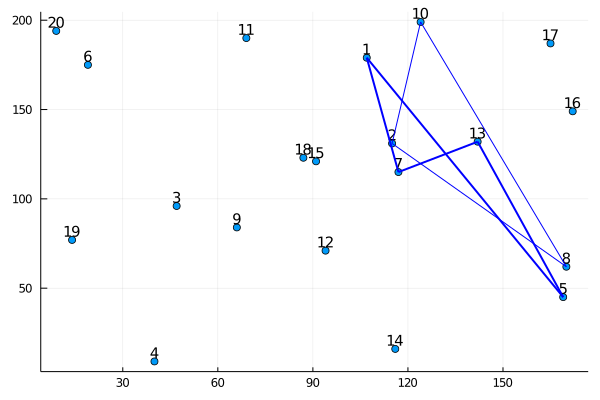

In [6]:
#Un ejemplo con 20 puntos aleatorios.
#Se dibujan las aristas (1,7),(7,13),(5,13),(1,5) con un peso de 1
# y las aristas (2,8), (2,10), (8,10) con un peso de 0.5


N=20
a = sample(1:200, 20, replace = false)
b = sample(1:200, 20, replace = false)
w = distancias(a,b)
scatter!(a,b)
ciclo_ejemplo=zeros(N,N)
ciclo_ejemplo[1,7]=1
ciclo_ejemplo[7,13]=1
ciclo_ejemplo[5,13]=1
ciclo_ejemplo[1,5]=1

ciclo_ejemplo[2,10]=0.5
ciclo_ejemplo[2,8]=0.5
ciclo_ejemplo[8,10]=0.5

dibuja(a,b,ciclo_ejemplo)

In [7]:
#imprimir la matriz de distancia w
w

20×20 Array{Float64,2}:
 0.0  48.6621  102.416   182.727   147.648  …   59.4643   138.033    99.1413
 0.0   0.0      76.4788  143.21    101.548      29.1204   114.529   123.309
 0.0   0.0       0.0      87.2812  132.231      48.2597    38.0789  105.109
 0.0   0.0       0.0       0.0     133.929     123.309     72.8011  187.579
 0.0   0.0       0.0       0.0       0.0       113.172    158.269   218.634
 0.0   0.0       0.0       0.0       0.0    …   85.6037    98.1275   21.4709
 0.0   0.0       0.0       0.0       0.0        31.0483   109.786   133.81
 0.0   0.0       0.0       0.0       0.0       103.005    156.719   208.195
 0.0   0.0       0.0       0.0       0.0        44.2945    52.469   123.891
 0.0   0.0       0.0       0.0       0.0        84.5281   164.268   115.109
 0.0   0.0       0.0       0.0       0.0    …   69.3758   125.674    60.1332
 0.0   0.0       0.0       0.0       0.0        52.469     80.2247  149.513
 0.0   0.0       0.0       0.0       0.0        55.7315   139.

***
***

En lo que sigue  $G=(V,E)$ es un grafo **completo** con $V=[N]$, Los siguientes cuatro modelos son modelos exactos (posiblemente extendidos y en el sentido de puntos extremos) para encontrar un emparejamiento de peso mínimo. Consideraremos $E=\{[i,j]\colon 1\leq i < j\leq N\}$.


\begin{align*}
\text{(M1)}\quad  \min \sum_{e\in E} x_ew_e\\
x(E) &= N/2\\
x_{e}+x_{f}&\leq 1, \forall e, f \in E\colon |e\cap f|=1\\
0\leq x_e&\leq 1, \forall e\in E\\
x_e&\in \mathbb{Z}, \forall e\in E\\
\mbox{}\\
\text{(M2)}\quad  \min \sum_{e\in E} x_ew_e\\
x(\delta(i))&= 1, \forall i\in V\\
x_e&\geq 0, \forall e\in E\\
x_e&\in \mathbb{Z}, \forall e\in E\\
\mbox{}\\
\text{(M3)}\quad  \min \sum_{e\in E} x_ew_e\\
x(\delta(i))&= 1, \forall i\in V\\
y(V)&=n/2\\
x_{ij}&\leq y_{i}+y_{j}, \forall e=ij \in E\\
x_{ij}&\leq 2-y_{i}+y_{j}, \forall e=ij \in E\\
x_e&\geq 0, \forall e\in E\\
0\leq y_v&\leq 1, \forall v\in V\\
y_v&\in \mathbb{Z}, \forall v\in V\\
\mbox{}\\
\text{(M4)}\quad  \min \sum_{e\in E} x_ew_e\\
x(E) &= N/2\\
x(E(S))&\leq \frac{|S|-1}{2}, \forall S\subseteq V, |S| \text{ impar}\\
0\leq x_e&\leq 1, \forall e\in E\\
\end{align*}

Los 4 modelos son bastante distintos entre sí. 

El primer modelo es un PLE con $m=\Theta(N^2)$ variables enteras y $\Theta(N^3)$ restricciones.

El segundo modelo es un PLE con $m=\Theta(N^2)$ variables enteras y $\Theta(N)$ restricciones (ignorando cotas).

El tercer modelo es un PL Mixto con $m=\Theta(N^2)$ variables continuas, $N$ variables enteras y $\Theta(N^2)$ restricciones.

El cuarto modelo es un PL puro con  $m=\Theta(N^2)$ variables continuas  y $\Theta(2^N)$ restricciones. Un teorema de Edmonds garantiza que los puntos extremos de (M4) son exactamente matchings perfectos.



# Ejercicio 1. Responder en Markdown.

En clases vimos que los modelos 1 y 2 son exactos. El modelo 4 también es exacto (en el sentido integral) y con formulación ideal (es decir, los puntos enteros de la formulación corresponden exactamente a matching perfectos y viceversa).

Veamos que el modelo 3 es, en cierto modo, también un modelo (extendido) exacto con buena formulación.

Demuestre las siguientes propiedades del modelo 3 en las siguientes celdas (usando markdown para formatear)

1.1: Para todo  matching perfecto $M$ existen variables $(x, y)$ factibles tal que $M$ está representado por $x$. Explique el rol de la variable $y$. 

1.2: Demuestre que para todo punto $(x,y)$ factible en (M3), tal que x tiene todas sus coordenadas enteras, $x$ es la indicatriz de un matching perfecto.

1.3: Demuestre que para todo $(x,y)$ factible en (M3), existe un $x'$ entero tal que  $(x',y)$ es factible en (M3) de menor o igual valor objetivo que $(x,y)$. Concluya que todo óptimo de (M3) se puede transformar en un matching perfecto de costo mínimo.


## Solución al ejercicio 1.1

En efecto, en el modelo 3 la variable $x$ puede tomar valores no enteros, así que para evitar estos casos se define una variable entera auxiliar $y$, cuyo rol consiste en evitar que $x_e > 1$. Las restricciones $x_{ij} \leq y_{i}+y_{j}$ // $x_{ij} \leq 2-y_{i}-y_{j}$ con $ij=e \in E$, obligan a que $x_e \in [0,1]$ $\forall e \in E$. Ya que de no ser así, es posible que las aristas que seleccione $x$ formen un ciclo en lugar de un matching perfecto. 

## Solución al ejercicio 1.2

En efecto, como $x$ sólo toma valores enteros y está acotada superiormente por $y_{i}+y_{j}$  e  $2-y_{i}-y_{j}$ con $ij=e \in E$, y además $0\leq y_v \leq 1$ $\forall v\in V$, entonces $x_e \in \{0,1\}$ $\forall e \in E$. Luego por definición de $x$, se tiene que $x_e=1$ si la arista $e$ es factible. 

Como la función objetivo es encontrar emparejamientos de peso mínimo, se tiene que el conjunto de todas las aristas factibles conforman un matching, y por el problema anterior, todo matching perfecto está representado por $x$. Luego se define el conjunto $S$ como el conjunto solución que contiene a todas las aristas factibles, por lo tanto $x(e) = 1_{S} (e)$ = 1 si $e \in S$, 0 si $e \notin S$, es decir, $x$ es la indicatriz de un matching perfecto. 

## Solución al ejercicio 1.3

Debido a que $x$ es una variable real, y a sus restricciones, se tiene que $x \in [0,1]$. Luego si todos los pesos son no negativos, entonces si existe algún $f$ factible talque $x_{f} \in (0,1)$, se tiene que $\min \sum_{e\in E} x_ew_e = x_f w_f + \min \sum_{e\in E \setminus \{f\}} x_ew_e \geq \min \sum_{e\in E} x'_ew_e$ con $x'_f = 0$. 

Como estamos buscando el emparejamiento de peso mínimo, entonces $\min \sum_{e\in E} x'_ew_e$ está bien definido para $x'$. Entonces basta tomar $x'_e = 0$ para toda arista $e$ talque $x_e \in (0,1)$. Notemos que está solución es entera y tiene valor objetivo menor o igual al problema original. Por lo tanto, existe una solución entera que cumple las condiciones buscadas. 

Además, por los problemas anteriores 1.1 y 1.2, toda variable entera $x'$ representa un matching perfecto, esto nos dice que toda solución factible en (M3) se puede transformar en un matching perfecto de costo mínimo. 

# Ejercicio 2. En Julia.

Escriba una función 
```julia
emparejamiento(num_modelo, N, w) 
return modelo
```

que reciba como entrada:
```julia
num_modelo: entero en {1,2,3,4} que representa si se trabaja con M1, M2, M3 o M4.
N: número de vértices del grafo
w: matriz de pesos
```
y entregue el modelo en juMP/Gurobi asociado al grafo entregado.


Indicación:
Le recomendamos escribir uno de los modelos primero y seguir con los otros ejercicios, para que pueda probarlo. 
Una vez que esté listo, escriba los demás modelos.


In [8]:
function M1(N,w)
    E=powerset(1:N,2,2)
    
    mimodelo = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV))) # para multiples modelos en jupyter
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    
    #variable
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E]<=1, Int)  
    
    #funcion objetivo
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    
    #Restricciones
    @constraint(mimodelo,const1, sum(x[e[1],e[2]] for e in E)==N/2)
    
    for e in E
        for f in E
            if length(intersect(e,f))==1
                @constraint(mimodelo, x[e[1],e[2]]+x[f[1],f[2]]<=1)
            end
        end
    end
        
    return mimodelo
end

M1 (generic function with 1 method)

In [9]:
function M2(N,w)
    E=powerset(1:N,2,2)
    V=powerset(1:N,1,1)
    
    mimodelo = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV))) # para multiples modelos en jupyter
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    
    #variable
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E], Int)  
    
    #funcion objetivo
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    
    #Restricciones 
    for S in V
        @constraint(mimodelo, (sum(x[e[1],e[2]] for e in E if e[1]==S[1] || e[2]==S[1]))==1)
    end
    
    return mimodelo
end

M2 (generic function with 1 method)

In [10]:
function M3(N,w)
    E=powerset(1:N,2,2)
    V=powerset(1:N,1,1)
    
    mimodelo = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV))) # para multiples modelos en jupyter
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    
    #variable
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E])
    @variable(mimodelo, 0<=y[v in 1:N; [v] in V]<=1, Int)
    
    #funcion objetivo
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    
    #Restricciones
    @constraint(mimodelo,const1, sum(y[v[1]] for v in V)==N/2)
    
    for S in V
        @constraint(mimodelo, (sum(x[e[1],e[2]] for e in E if e[1]==S[1] || e[2]==S[1]))==1)
    end
    
    for e in E
        @constraint(mimodelo, x[e[1],e[2]]<=y[e[1]]+y[e[2]])
        @constraint(mimodelo, x[e[1],e[2]]<=2-y[e[1]]-y[e[2]])
    end
    
    return mimodelo
end 

M3 (generic function with 1 method)

In [11]:
function aristas_en(E,S)
    set= [e for e in E if e[1] in S && e[2] in S]
    return set
end

function M4(N,w)
    E=powerset(1:N,2,2)
    
    mimodelo = Model(optimizer_with_attributes(() -> Gurobi.Optimizer(GUROBI_ENV))) # para multiples modelos en jupyter
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    
    #variable
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E]<=1)  
    
    #funcion objetivo
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    
    #Restricciones
    @constraint(mimodelo,const1, sum(x[e[1],e[2]] for e in E)==N/2)
    
    for S in powerset(1:N, 1, N)
        if length(S)%2==1
            @constraint(mimodelo, sum(x[e[1], e[2]] for e in aristas_en(E,S))<= (length(S) - 1)/2)
        end
    end
        
    return mimodelo
end

M4 (generic function with 1 method)

In [12]:
# Escriba su respuesta aquí
# Esconda la salida de Gurobi escribiendo el comando

function emparejamiento(num_modelo, N, w)   
    d=Dict(1=>M1(N,w), 2=>M2(N,w), 3=>M3(N,w), 4=>M4(N,w)) #diccionario que contiene a los modelos
    mimodelo=d[num_modelo] #se elige el modelo
    return mimodelo
end
            
    
# las 2 celdas siguientes contiene un ejemplo que puede usarlo para probar su método 

emparejamiento (generic function with 1 method)

In [13]:
# Celda para probar el método anterior
N=6
a = [63, 114, 165, 14, 140, 180]
b = [174, 133, 54, 87, 47, 35]
w = distancias(a,b)
num_mod=1 # o el modelo que desee probar

modelo1=emparejamiento(num_mod, 6, w)
optimize!(modelo1)
@show(objective_value(modelo1))
@show(JuMP.simplex_iterations(modelo1))
@show(JuMP.node_count(modelo1));

#Nota: El valor objetivo debería ser alrededor de 213.9016339...

objective_value(modelo1) = 213.90163398561813
JuMP.simplex_iterations(modelo1) = 7.0
JuMP.node_count(modelo1) = 1.0


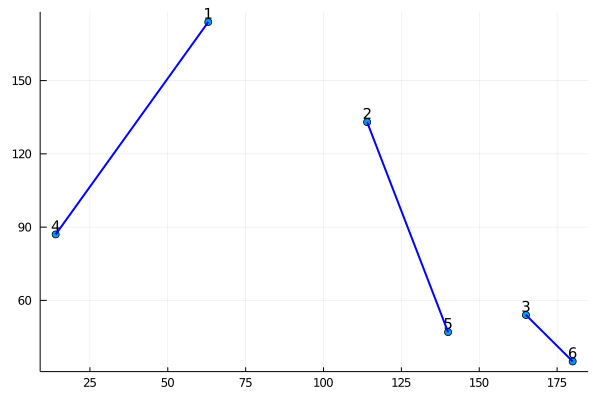

In [14]:
# Celda para dibujar el matching encontrado
X = zeros(N,N)
for i in 1:N, j in 1:N
    if i<j
    X[i,j]=value(modelo1[:x][i,j])
    end
end
dibuja(a,b,X)

# Ejercicio 3. En Julia

Parte 1. Escriba una función test_matching(N_MAX) que realice lo siguiente.

1. Genere una instancia aleatoria (N, coordX,coordY,w) para cada N par entre 6 y N_MAX 
   donde coordX, coordY son puntos de la grilla 1:200 por 1:200 y w es su matriz de distancia.
   (el comando sample(1:200, N, replace = false) entrega N enteros entre 1 y 200 sin repetición)
   
   Nota: Guarde las instancias creadas en un arreglo (en el formato que usted desee), durante su ejecución pues debe retornarlas al final. 

2. Para cada instancia (N,coordX,coordY,w) de su lista y cada modelo (num_mod), calcule y guarde los siguientes valores:
    1. Valor de N
    2. valor de num_mod
    3. Numero de variables del modelo (busque el comando en la documentación de JuMP)
    4. Numero de restricciones del modelo (busque el comando en la documentación de JuMP)
    5. Tiempo de creación del modelo a partir de (N,coordX,coordY,w).   
    
            NOTA: Investigue el comando @elapse. Por ejemplo, ejecute
            A=@elapse B = 100*20; A,B; 
    6. Tiempo de resolución del modelo creado.
    7. Valor objetivo encontrado (si logró terminar, si no, entregar 0).
    
            NOTA: Debe testear si el modelo termina de ejecutar usando termination_status
            
    8. Numero de iteraciones de simplex realizadas (JuMP.simplex_iterations(nombre_modelo))
    9. Numero de nodos BnB realizados (JuMP.node_count(nombre_modelo))
   
   Luego elimine integralidad de las variables del modelo, resuelva nuevamente y calcule
   
    10. Tiempo de resolución del modelo fraccional 
    11. Valor objetivo encontrado (si logró terminar, si no, entregar 0)
    12. Numero de iteraciones de simplex realizadas
    
3. Retorne un par INSTANCIAS, TABLA 

Parte 2. Cuando termine su función ejecute test_matching(8) y test_matching(20), mostrando la TABLA creada. 
NOTA: la última tabla debería tener 80 filas.

Parte 3. (opcional) Si su computador logra tiempos razonables sin quedarse sin memoria, ejecute test con el número más alto que pueda correr. 

Sugerencia: Un formato razonable de tabla es el de la siguiente celda


In [15]:
ENV["COLUMNS"]=200
df=DataFrame(
    :N                 => Int64[],
    :num_modelo        => Int64[],
    :variables         => Int64[],
    :restricciones     => Int64[],
    :t_creacion_ent    => Float64[],
    :t_resolucion_ent  => Float64[],
    :valor_ent         => Float64[],
    :simplex_ent       => Int64[],
    :nodos_bnb         => Int64[],
    :t_resolucion_frac => Float64[],
    :valor_frac        => Float64[],
    :simplex_frac      => Int64[]) 
push!(df,[6, 1, 18, 60, 0.55, 1.223, 14.4, 10, 7, 2, 0.33, 5])

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,18,60,0.55,1.223,14.4,10,7,2.0,0.33,5


In [16]:
# Escriba su función acá

"Funcion que auxiliar que determina si el modelo tiene solucion o no."
function valorObjetivo(modelo)
    if termination_status(modelo)==6
        valor=0
        return valor
    else
        valor=objective_value(modelo)
        return valor
    end
end 

"Funcion auxiliar que determina el numero de restricciones de un modelo"
function num_restricciones(modelo)
    num_rest=0
    for restriccion in [AffExpr,VariableRef]
        num_rest=num_rest+num_constraints(modelo,restriccion,MOI.EqualTo{Float64})
        num_rest=num_rest+num_constraints(modelo,restriccion,MOI.LessThan{Float64})
        num_rest=num_rest+num_constraints(modelo,restriccion,MOI.GreaterThan{Float64})
        num_rest=num_rest+num_constraints(modelo,restriccion,MOI.Integer)
        num_rest=num_rest+num_constraints(modelo,restriccion,MOI.ZeroOne)
    end
    return num_rest
end

"Funcion auxiliar que determina si a un modelo se le puede eliminar la integralidad, y lo resuelve en el caso de ser posible"
function nuevosDatos(modelo,m,t_resolucion,valor,simplex)
    if (m==1 || m==2)
        for variable in modelo[:x]
            unset_integer(variable)
        end
        t_resolucion_frac=@elapsed optimize!(modelo)
        valor_frac=valorObjetivo(modelo)
        simplex_frac=JuMP.simplex_iterations(modelo)
        return (t_resolucion_frac,valor_frac,simplex_frac)
        
    elseif m==3
        for variable in modelo[:y]
            unset_integer(variable)
        end
        t_resolucion_frac=@elapsed optimize!(modelo)
        valor_frac=valorObjetivo(modelo)
        simplex_frac=JuMP.simplex_iterations(modelo)
        return (t_resolucion_frac,valor_frac,simplex_frac)
        
    else
        return (t_resolucion,valor,simplex)
   
    end
end

"Funcion que entrega las instancias y una tabla con los resultados recopilados"
function test_matching(N_MAX)
    #Se generan intancias aleatorias y las guarda cunado N es par
    INSTANCIAS=[] 
    for N in 6:N_MAX
        if N%2==0
            coordX=sample(1:200, N, replace = false)
            coordY=sample(1:200, N, replace = false)
            w=distancias(coordX,coordY)
            instancia=[N,coordX,coordY,w]
            push!(INSTANCIAS,instancia)
        end
    end
    
    #Se crea la tabla
    ENV["COLUMNS"]=200
    TABLA=DataFrame(
        :N                 => Int64[],
        :num_modelo        => Int64[],
        :variables         => Int64[],
        :restricciones     => Int64[],
        :t_creacion_ent    => Float64[],
        :t_resolucion_ent  => Float64[],
        :valor_ent         => Float64[],
        :simplex_ent       => Int64[],
        :nodos_bnb         => Int64[],
        :t_resolucion_frac => Float64[],
        :valor_frac        => Float64[],
        :simplex_frac      => Int64[]) 
  
    #Se guardan los datos y resultados en la tabla
    for i in INSTANCIAS 
        N=i[1]
        w=i[4]
        for m in 1:4
            t_creacion_ent=@elapsed emparejamiento(m, N, w)
            modelo=emparejamiento(m, N, w)
            optimize!(modelo)
            variables=num_variables(modelo::Model)  
            restricciones=num_restricciones(modelo)
            t_resolucion_ent=@elapsed optimize!(modelo)
            valor_ent=valorObjetivo(modelo)
            simplex_ent=JuMP.simplex_iterations(modelo)
            nodos_bnb=JuMP.node_count(modelo)
            (t_resolucion_frac,valor_frac,simplex_frac)=nuevosDatos(modelo,m,t_resolucion_ent,valor_ent,simplex_ent)
            
            push!(TABLA,[N,m,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,
                    t_resolucion_frac,valor_frac,simplex_frac])
        end
    end 
                   
    return INSTANCIAS , TABLA 
end
    

test_matching

In [17]:
# Pruebe su función acá
INSTANCIAS8, TABLA8 = test_matching(8);
TABLA8

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,15,166,0.0015985,0.0001097,231.029,6,0,0.0005197,217.448,5
2,6,2,15,36,0.0015614,8.08e-5,231.029,6,0,0.0002929,231.029,5
3,6,3,21,70,0.0014122,9.0501e-5,231.029,8,0,0.0003483,231.029,8
4,6,4,15,63,0.0015946,3.85e-5,231.029,0,0,3.85e-5,231.029,0
5,8,1,28,421,0.0031764,0.0001031,181.866,7,0,0.0005557,172.338,8
6,8,2,28,64,0.019951,7.9799e-5,181.866,7,0,0.0002806,181.866,6
7,8,3,36,117,0.0030742,0.0001221,181.866,11,0,0.000406199,181.866,12
8,8,4,28,185,0.0032018,3.93e-5,181.866,0,0,3.93e-5,181.866,0


In [18]:
# Pruebe su función acá
INSTANCIAS20, TABLA20 = test_matching(20);
TABLA20

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,15,166,0.0023209,8.9299e-5,179.727,4,0,0.000538301,179.727,5
2,6,2,15,36,0.0017115,8.86e-5,179.727,5,0,0.0003044,179.727,4
3,6,3,21,70,0.0017173,7.61e-5,179.727,6,0,0.0004157,179.727,6
4,6,4,15,63,0.0022813,3.98e-5,179.727,0,0,3.98e-5,179.727,0
5,8,1,28,421,0.0033712,9.7999e-5,222.615,8,0,0.0006326,210.052,8
6,8,2,28,64,0.0050475,6.33e-5,222.615,5,0,0.0002726,222.615,4
7,8,3,36,117,0.0045452,0.0001196,222.615,10,0,0.0004609,222.615,9
8,8,4,28,185,0.0034146,4.09e-5,222.615,0,0,4.09e-5,222.615,0
9,10,1,45,856,0.0264393,0.0001218,259.224,9,1,0.0010997,212.672,10


In [23]:
# Pruebe su función acá con el valor más grande que pueda.
"Mi computador no tolera valores superiores a N=20"

"Mi computador no tolera valores superiores a N=20"

# Ejercicio 4. En Julia y en Markdown

Se sabe que los modelos 1 al 3 requieren de sus condiciones de integralidad.
Busque, ya sea en las instancias generadas al azar de la parte anterior, o en otras que genere usted 
una instancia donde las versiones fraccionales de los 4 modelos sean lo más distintas posibles (en valor objetivo)

Muestre los valores objetivos y dibuje los puntos fraccionales (solo la parte que corresponde a x) optimos asociados a los 4 modelos.

Además, responda a  las siguientes preguntas abiertas:
¿Puede encontrar una instancia donde los 4 valores difieran? (Justifique)
¿Qué modelo tiene el menor valor objetivo, el segundo, el tercero y el cuarto? ¿Deben siempre estar en este orden? (Justifique su respuesta) 

In [20]:
# instancia encontrada (escribala aquí, debe ser fija, no generada aleatoriamente cada vez que corra el código)
N=20
coordx=[105, 150, 20, 65, 113, 69, 107, 5, 98, 121, 117, 136, 88, 79, 172, 141, 118, 199, 122, 147]
coordy=[120, 191, 58, 188, 139, 127, 4, 109, 55, 193, 96, 187, 145, 83, 35, 77, 108, 44, 22, 158]
w=distancias(coordx,coordy)

# Resuelva la instancia con los 4 modelos (recuerde quitar la integralidad)
  
Valores=Float64[]
Modelos=[]
for m in 1:4
    modelo=emparejamiento(m,N,w)
    optimize!(modelo)
    push!(Modelos,modelo)
    
    if m==4
        valor=valorObjetivo(modelo)
        push!(Valores,valor)
    else
        valor=nuevosDatos(modelo,m,0,0,0)[2]
        push!(Valores,valor)
    end
    
end


# Muestre una tabla con valores objetivos
ENV["COLUMNS"]=200
TABLA=DataFrame(
    :Modelo1    => Float64[],
    :Modelo2    => Float64[],
    :Modelo3    => Float64[],
    :Modelo4    => Float64[])

push!(TABLA,Valores)

,Modelo1,Modelo2,Modelo3,Modelo4
,Float64,Float64,Float64,Float64
1,258.351,317.457,317.457,323.096


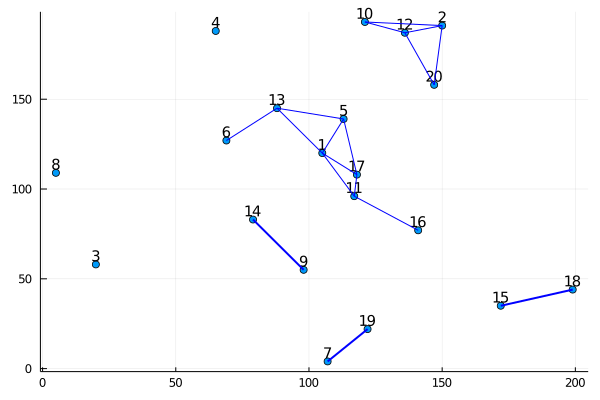

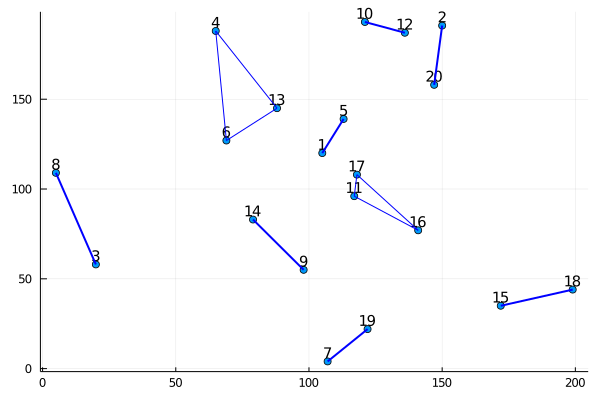

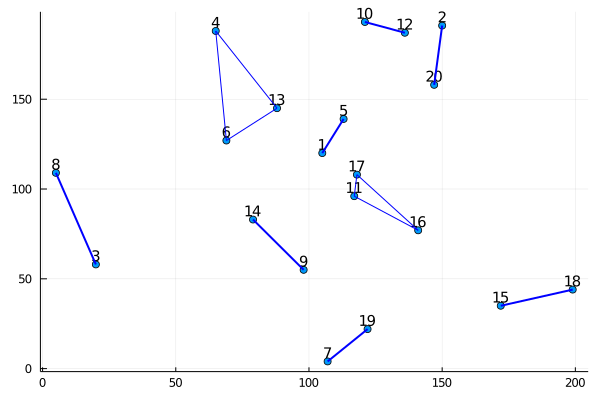

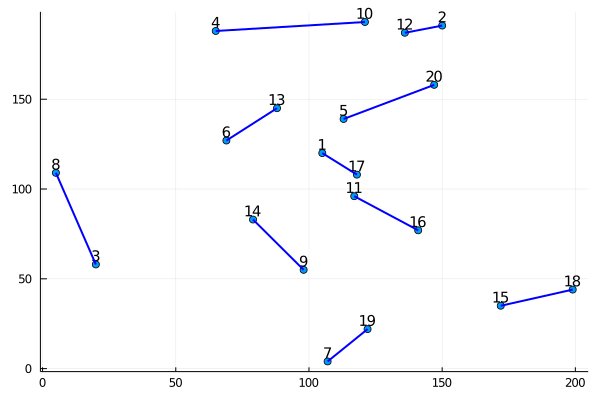

El orden de los gráficos es el siguiente: M1 - M2 -M3 - M4

In [21]:
#dibujos para las 4 soluciones fraccionales encontradas
print("El orden de los gráficos es el siguiente: M1 - M2 -M3 - M4")
X = zeros(N,N)
graficos=[]
for m in 1:4
    for i in 1:N, j in 1:N
        if i<j
        X[i,j]=value(Modelos[m][:x][i,j])
        end
    end
    dibuja(coordx,coordy,X)
end


### Respuesta a las preguntas abiertas:

**¿Puede encontrar una instancia donde los 4 valores difieran?**

No es posible encontrar tal instancia, ya que al quitar la integralidad al modelo 3 y 2, queda en ensencia el mismo problema de optimización, cuyas restricciones consisten en variables positivas que toman las aristas con corte igual 1.

**¿Qué modelo tiene el menor valor objetivo, el segundo, el tercero y el cuarto?**

El modelo que tiene menor valor es el primero. El segundo y el tercero simpre tienen el mismo valor, mientras que el cuarto es el que puede alcanzar un mayor valor objetivo. 

**¿Deben siempre estar en este orden?**

Si, ya que el primero solo considera las aristas que comparten un solo vertice, por lo que el conjunto sobre el que trabaja es menor. Luego el cuarto modelo considera en un principio la mitad de las aristas, por lo que considera más aristas aristas que el resto de modelos, dando como resultado matchings perfectos, lo que se traduce en un mayor valor objetivo. 